## What is Logistic Regression?

Logistic Regression has been described as a statistical model which is used for classification and predictive analysis.

Logistic Regression works by estimating the probability of an event to occure, this estimated value has a range from 0 to 1, the higher the range the higher the likelihood of the event occurring.

**Advantages:**
1.   Does not require high computation power.
1.   Easy to implement.
2.   Easy to interperate.
1.   Scaling the features is not needed.

**Disadvantages:**
1.   Not able to handle a large number of categorical features/variables.
2.   It is vulnerable to overfitting.
1.   Logistic Regression will not perform well with independent variables which have no correlation.

**Reference:**

What is logistic regression? - https://www.ibm.com/topics/logistic-regression#:~:text=Resources-,What%20is%20logistic%20regression%3F,given%20dataset%20of%20independent%20variables.

## Why the dataset is appropriate for this analysis?

 **Link to the dataset used**  - https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data**

*   Logistic Regression is well suited for binary classification, thus being a good choice when dealing with wanting to build a model which will classify a transaction of being either fraudulent or not.

*   Additionally the dataset houses a total of 568630 rows which meets the required amount of 500000 rows.

## Analysis:

*   The task is to build a Logistic Regression Model from Scratch, without the help of any Data Science/ Analysis Libraries.

*   The dataset is clean with no missing or null values, thus making the prepartions easier, with only needing to remove the id column and split the data up for the training and testing phase.


*   The dataset is clean with no missing or null values, thus making the prepartions easier, with only needing to remove the id column and split the data up for the training and testing phase.

*   Two Models were built, one using sklearn imports to do the logistic regression, whilst the other was built from scratch, the models will be compared to one another to test whether it is more effective to simply use the sklearn or any other logistic regression libraries or to create the models by hand instead.

*   For the from scratch model, the split training and testing data will; first need to be modified so as to work with the built model, another is the transposing of the data, for if this is not done then the model will not function thus failing to execute.

*   For the built model three methods will be needed the sigmoid function method, which is used to determine the sigmoid value for each row, the other is the model which uses the sigmoid function method, and lastly the accuracy method which will provide the model's accuracy as a percentage.

*   Lastly the models results will then be used to see which performs better.



---


### The Below code is to allow easy access to the dataset used for PDAN8412 TASK 2.


---



In [ ]:
# Installing Kaggle API
#!pip install -q kaggle

In [ ]:
# Uploading Kaggle.json file
#from google.colab import files
#files.upload()

In [ ]:
# Creating Kaggle folder
#! mkdir ~/.kaggle

In [ ]:
# Copying Kaggle.json to kaggle folder
#! cp kaggle.json ~/.kaggle/

In [ ]:
# Permission for json to act
#! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#! kaggle datasets list

In [ ]:
# Code to download the dataset using kaggle API

# Link to dataset - https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data

#!kaggle datasets download -d nelgiriyewithana/credit-card-fraud-detection-dataset-2023

In [ ]:
#!unzip credit-card-fraud-detection-dataset-2023.zip

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

In [ ]:
df = pd.read_csv("creditcard_2023.csv")
df.shape

(568630, 31)

In [ ]:
# Getting a sample of the dataset -> 25%
dfSample = df.sample(replace=False, frac=0.25, random_state=1)
dfSample.shape

(142158, 31)

In [ ]:
dfSample.head(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27360,27360,0.956335,-0.833900,0.373726,-0.955751,0.626518,2.461227,-0.006515,0.098449,0.216929,...,-0.146630,-0.157350,-0.127570,2.159958,0.559499,-0.579113,-0.134723,0.038368,7355.90,0
232924,232924,1.824595,-0.403310,-0.086835,-0.455694,0.444974,-0.005611,0.487221,-0.197656,0.869327,...,-0.258662,-0.914829,0.312649,0.778116,-0.486512,0.419574,-0.311823,-0.179760,18787.53,0
396992,396992,-0.856223,1.012419,-1.135089,1.587062,-1.002695,-1.669996,-1.222057,0.550104,-1.740007,...,0.653577,0.041299,-0.008909,0.942546,0.662985,0.225465,2.332999,1.664207,16140.84,1
563915,563915,-1.024182,0.183481,-0.796683,0.111732,0.008095,-1.768683,-0.612714,0.476449,-0.632504,...,0.175237,-0.185810,-1.856476,-0.315129,1.513697,-0.435320,0.664273,-1.403490,6447.22,1
46094,46094,-0.078420,-0.462679,2.267058,-0.721919,0.120943,0.548243,0.327124,-0.078154,0.572333,...,-0.086606,0.057531,-0.073671,0.211295,-0.597159,2.106545,-0.195852,0.142351,15371.67,0




---


### Visualising Count Plot for each Class for Original Dataframe

---



<Axes: xlabel='Class', ylabel='count'>

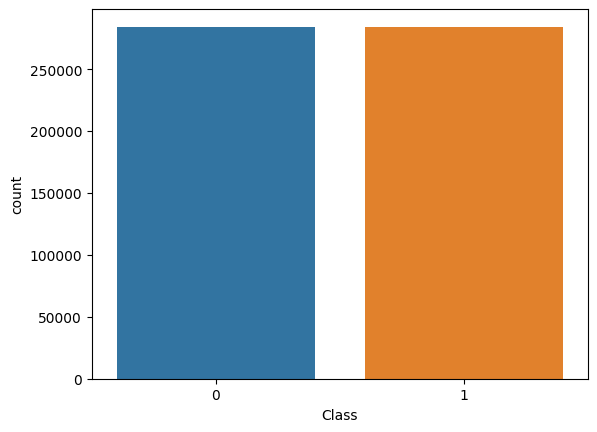

In [ ]:
sb.countplot(data = df, x='Class')

In [ ]:
Not_Fraud = len(df[df["Class"]== 0])
Fraud = len(df[df["Class"]== 1])

print('Number of fraud transactions: ',Fraud)
print('Number of non-fraud transactions: ',Not_Fraud)

Number of fraud transactions:  284315
Number of non-fraud transactions:  284315




---


### Visualising Count Plot for each Class for Sample Dataframe

---



<Axes: xlabel='Class', ylabel='count'>

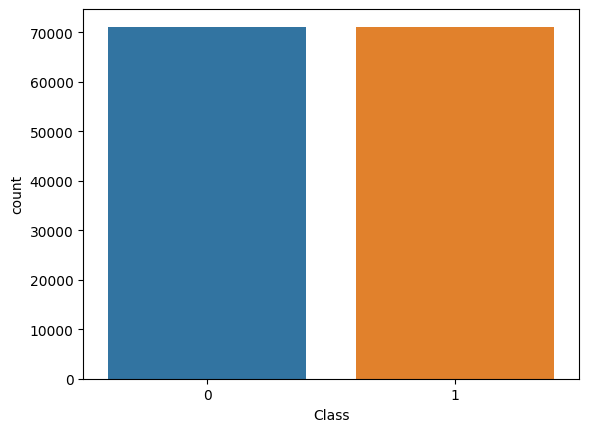

In [ ]:
sb.countplot(data = dfSample, x='Class')

In [ ]:
Not_Fraud = len(dfSample[dfSample["Class"]== 0])
Fraud = len(dfSample[dfSample["Class"]== 1])

print('Number of fraud transactions: ',Fraud)
print('Number of non-fraud transactions: ',Not_Fraud)

Number of fraud transactions:  71015
Number of non-fraud transactions:  71143




---


### CounterPlot Observations: Sample size data split between fraud and not fraud is close to the original percentage spread.

---



<Axes: >

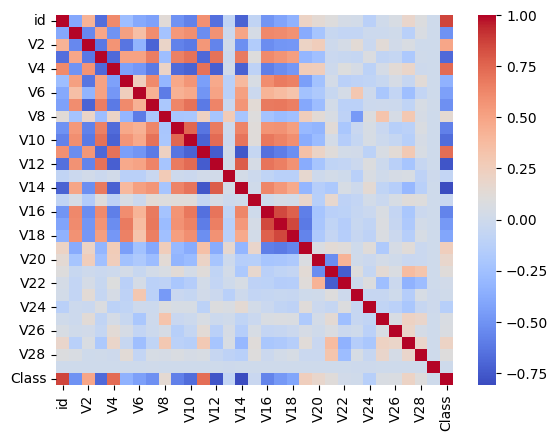

In [ ]:
sb.heatmap(dfSample.corr(),cmap="coolwarm")



---


### Splitting Sample Dataframe into Training and Testing Data


---



In [ ]:
# Splitting Independent and Dependent Variables
X = dfSample.drop(['id','Class'], axis = 1)
y = dfSample['Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)



---


### Sklearn Logistic Regression Model

---



In [ ]:
from sklearn.linear_model import LogisticRegression

Model_Log = LogisticRegression(random_state=2)

Model_Log.fit(X_train, y_train)

y_pred = Model_Log.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Fraud', 'Fraud'])

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

Log_Model_acc = accuracy_score(y_test, y_pred)

target_names = ['Not Fraud', 'Fraud']



---


### Logistic Regression From Scratch



---


**References which helped with creating Logistic Regression Model from Scratch**

**Implementation of Logistic Regression without using Built-In Library:** https://medium.com/technology-through-the-prism/implementation-of-logistic-regression-without-using-built-in-library-90e2afffa137

**Logistic Regression in Python from Scratch | Simply Explained:** https://youtu.be/nzNp05AyBM8?si=32bZRO3oarvHDpjY


---





---


## Process of reshaping for use in Logistic Regression


---



In [ ]:
# Creating seperate Train and Test Values for From Scratch Logisitc Regression Model (_FS = From Scratch)
X_train_FS = X_train.values
X_test_FS = X_test.values
y_train_FS = y_train.values
y_test_FS = y_test.values

In [ ]:
# Transposing X_train_FS adn X_test_FS
X_train_FS = X_train_FS.T
X_test_FS = X_test_FS.T

In [ ]:
# Transposing y_train_FS adn y_test_FS
y_train_FS = y_train_FS.reshape(1, y_train_FS.shape[0])
y_test_FS = y_test_FS.reshape(1, y_test_FS.shape[0])

In [ ]:
# Checking to make sure that the four values have been transposed
print('X_train: ',X_train_FS.shape)
print('y_train: ',y_train_FS.shape)
print('X_test: ',X_test_FS.shape)
print('y_test: ',y_test_FS.shape)

X_train:  (29, 113726)
y_train:  (1, 113726)
X_test:  (29, 28432)
y_test:  (1, 28432)




---


### The Creation of the Logistic Model and Sigmoid Methods


---



In [ ]:
# Method to determine the sigmoid value
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [ ]:
# Logistic Regression Model From Scratch
def model(X, Y, learning_rate, iterations):

  m = X_train_FS.shape[1] # Total number of Observations
  n = X_train_FS.shape[0] # Number of Features

  W = np.zeros((n,1)) # Weights
  B = 0 # Bias

  cost_list = [] # To store all cost values

  for i in range(iterations):

    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)

    cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))

    dW = (1/m)*np.dot(A-Y, X.T)
    dB = (1/m)*np.sum(A-Y)

    W = W - learning_rate*dW.T
    B = B - learning_rate*dB

    cost_list.append(cost)

    # if statement to print the cost value with the number of iterations currently iterating through
    if(i%(iterations/10) == 0):
      print("The cost after ", i, "iteration is : ", cost)

  return W, B, cost_list



---


### Training of the model with the displaying of the overall cost per each 1000 iterations with a training rate of 0.005


---



In [ ]:
# Setting model parameters with a total number of iterations equaling 10000, with a learning rate of 0.005
iterations = 10000
learning_rate = 0.005
W, B, cost_list = model(X_train_FS, y_train_FS, learning_rate = learning_rate, iterations = iterations)

<ipython-input-71-a1576e838ef6>:17: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
<ipython-input-71-a1576e838ef6>:17: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
<ipython-input-70-95caba112ada>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


The cost after  0 iteration is :  0.6931471805599453
The cost after  1000 iteration is :  nan
The cost after  2000 iteration is :  nan
The cost after  3000 iteration is :  nan
The cost after  4000 iteration is :  nan
The cost after  5000 iteration is :  nan
The cost after  6000 iteration is :  nan
The cost after  7000 iteration is :  nan
The cost after  8000 iteration is :  nan
The cost after  9000 iteration is :  nan




---


### Errors:


---


1.   RuntimeWarning: divide by zero encountered in log.
2.   RuntimeWarning: invalid value encountered in multiply.
1.   RuntimeWarning: overflow encountered in exp.

Error [1 & 2]: cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))

**Something is happening in the above code, however cannot figure out how to fix, Thus preventing the iterations after 0 to run correctly**


---


**If the cost calculation was working and after the many iterations, the way to better improve the model would be to modify the learning rate from 0.005 to a higher decimal, an example being 0.05 and seeing if the models cost function is decreased, thus providing a better and more accurate model.**


---








### Method to acquire the accuracy of the model

In [ ]:
def accuracy(X, Y, W, B):

  Z = np.dot(W.T, X) + B
  A = sigmoid(Z)

  A = A > 0.5

  A = np.array(A, dtype = 'int64')

  acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100

  print("Accuracy of Logistic Regression Model from Scratch is : ", acc, "%")



---


## Results


---



**Logistic Regression Model From Scratch:**



In [ ]:
accuracy(X_test_FS, y_test_FS, W, B)

Accuracy of Logistic Regression Model from Scratch is :  49.4478052898143 %


**Logistic Regression Model Sklearn:**

In [ ]:
print("The actual accuracy: ", Log_Model_acc) # Displays the actual accuracy percentage

The actual accuracy:  0.9566333708497468


In [ ]:
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

   Not Fraud       0.94      0.98      0.96     14373
       Fraud       0.98      0.93      0.96     14059

    accuracy                           0.96     28432
   macro avg       0.96      0.96      0.96     28432
weighted avg       0.96      0.96      0.96     28432



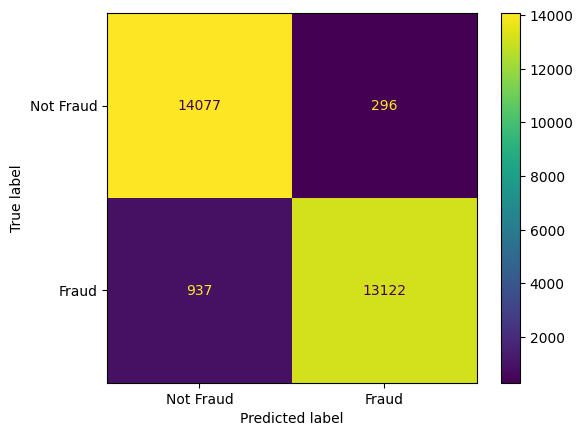

In [ ]:
cm_display.plot()

## Closing Remarking:

Due to an error in the from scratch model code the model cannot perform its cost functions calculations and iterate to learn the datasets patterns, thus resulting in a very poor performing model of 49.45%

Compared to the sklearn model which using default parameters achieved a accuracy score of 95.66% with the model having a confusion matrix performance as shown above, marking the sklearn model as the better pick and being more suited to complete the task given with a very low chance of classifiying a transaction incorrectly.